In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the Cleansed Data From PostgreSQL

In [12]:
from sqlalchemy import create_engine

# Define the PostgreSQL connection details
db_username = 'postgres'
db_password = 'gayathri'
db_host = 'localhost'          # or your PostgreSQL server's IP
db_port = '5432'               # default PostgreSQL port
db_name = 'LOAN'

# Create the connection string
connection_string = f'postgresql+psycopg2://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Query the loan_status table
query = "SELECT * FROM loan_status"
data = pd.read_sql(query, engine)



print("Data loaded successfully from PostgreSQL!")

Data loaded successfully from PostgreSQL!


In [13]:
data

Customer ID Loan Status  Current Loan Amount  \
0      981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1      2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2      5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid             287320.0   
3      e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4      81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                     ...         ...                  ...   
75563  cbb29fd6-e418-4f09-a4bd-4de83428caab  Fully Paid              48796.0   
75564  be67200e-1ef1-4b63-86a6-2bf27d3c704d  Fully Paid             210584.0   
75565  77f2252a-b7d1-4b07-a746-1202a8304290  Fully Paid             287320.0   
75566  2ced5f10-bd60-4a11-9134-cadce4e7b0a3  Fully Paid             103136.0   
75567  3e45ffda-99fd-4cfc-b8b8-446f4a505f36  Fully Paid             530332.0   

             Term  Credit Score  Annual Income Years in current job  \
0      Short Term    709.000000   1.167493e+06              8 years   
1      Short Term   1076.456089   1.378277e+06             10 years   
2      Short Term    741.000000   2.231892e+06              8 years   
3       Long Term    721.000000   8.069490e+05              3 years   
4      Short Term   1076.456089   1.378277e+06              5 years   
...           ...           ...            ...                  ...   
75563  Short Term   1076.456089   1.378277e+06              4 years   
75564  Short Term    719.000000   7.833890e+05               1 year   
75565  Short Term    732.000000   1.289416e+06               1 year   
75566  Short Term    742.000000   1.150545e+06              6 years   
75567  Short Term    746.000000   1.717524e+06              9 years   

      Home Ownership             Purpose  Monthly Debt  \
0      home mortgage   home improvements       5214.74   
1      home mortgage  debt consolidation      33295.98   
2           own home  debt consolidation      29200.53   
3           own home  debt consolidation       8741.90   
4               rent  debt consolidation      20639.70   
...              ...                 ...           ...   
75563  home mortgage      major_purchase       8298.63   
75564  home mortgage               other       3727.61   
75565           rent  debt consolidation      13109.05   
75566           rent  debt consolidation       7315.57   
75567           rent  debt consolidation       9890.07   

       Years of Credit History  Months since last delinquent  \
0                         17.2                           0.0   
1                         21.1                           8.0   
2                         14.9                          29.0   
3                         12.0                           0.0   
4                          6.1                           0.0   
...                        ...                           ...   
75563                      8.3                           0.0   
75564                     17.4                          18.0   
75565                      9.4                          21.0   
75566                     18.8                          18.0   
75567                     15.0                           0.0   

       Number of Open Accounts  Number of Credit Problems  \
0                          6.0                        1.0   
1                         35.0                        0.0   
2                         18.0                        1.0   
3                          9.0                        0.0   
4                         15.0                        0.0   
...                        ...                        ...   
75563                      9.0                        0.0   
75564                      6.0                        0.0   
75565                     22.0                        0.0   
75566                     12.0                        1.0   
75567                      8.0                        0.0   

       Current Cred

In [14]:
data.rename(columns={'Loan Status': 'Loanstatus'}, inplace=True)

In [15]:
data.groupby('Loanstatus').size()

Loanstatus
Charged Off    22639
Fully Paid     77361
dtype: int64

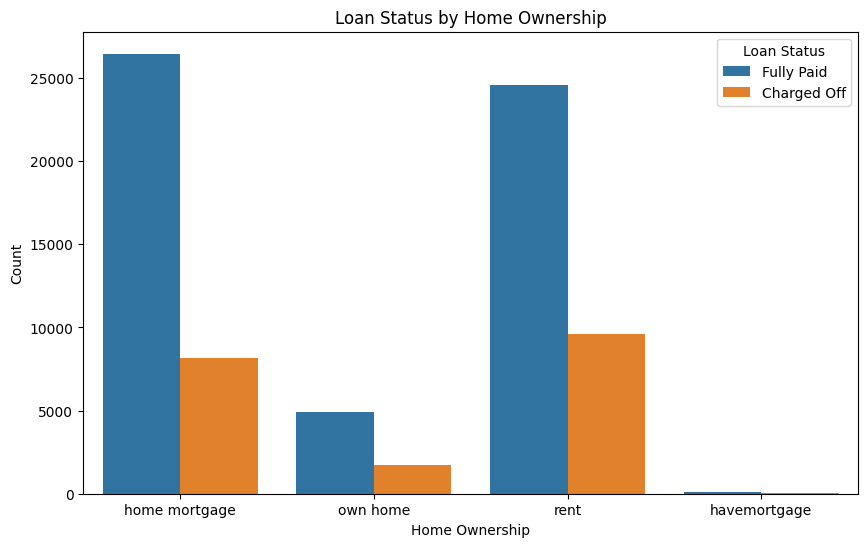

In [17]:
# Plot the count of Loan Status by Home Ownership
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Home Ownership', hue='Loan Status')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

Home mortagers and renters show a slighltly similar pattern, where as own home ownsers show less riskier.

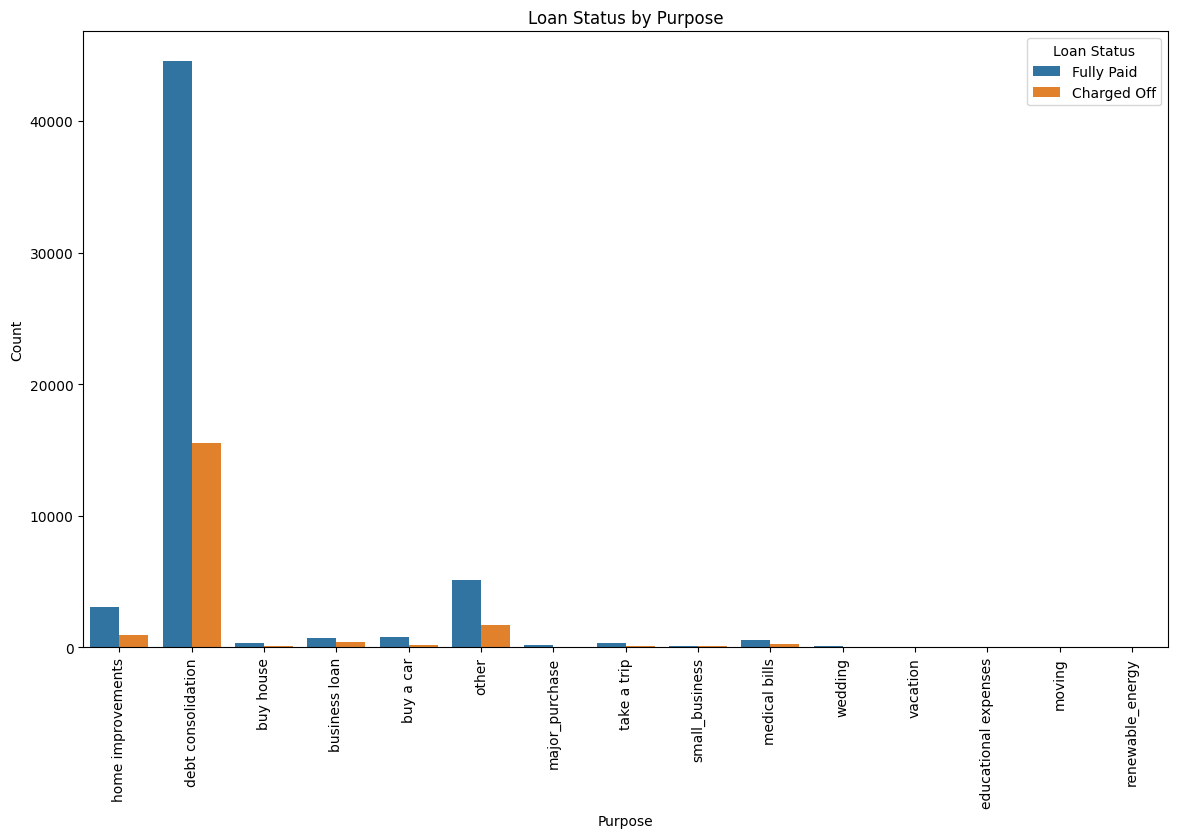

In [18]:
# Plot the count of Loan Status by Purpose
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Purpose', hue='Loan Status')
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The risk of giving funds to debt consolodation category seems higher, compared to others.

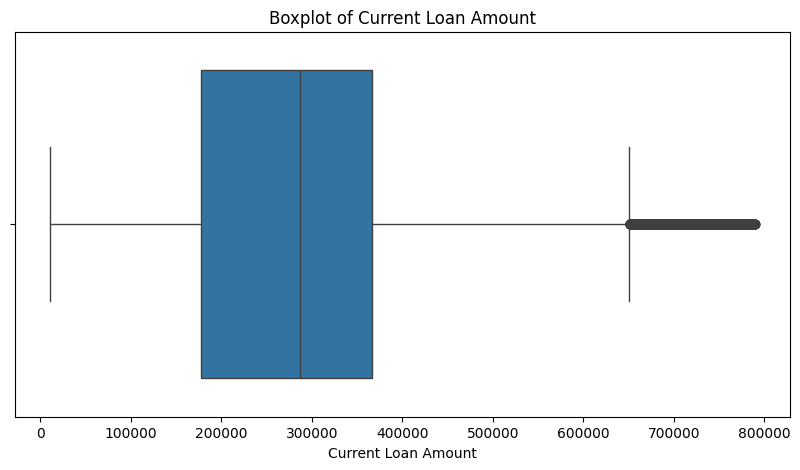

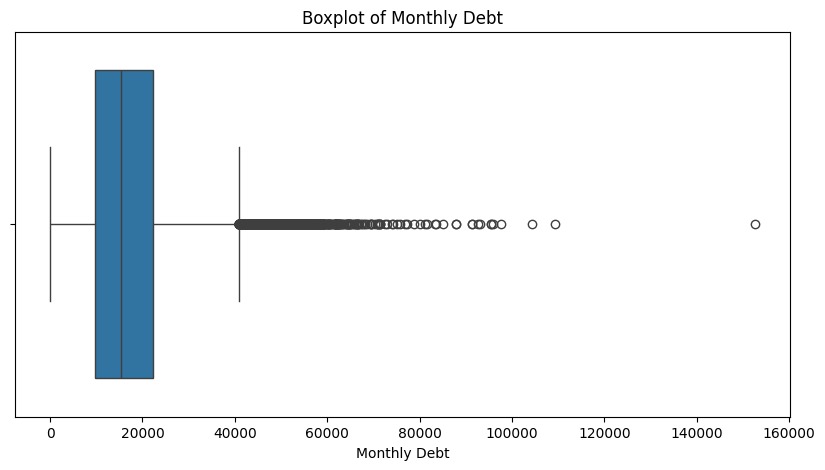

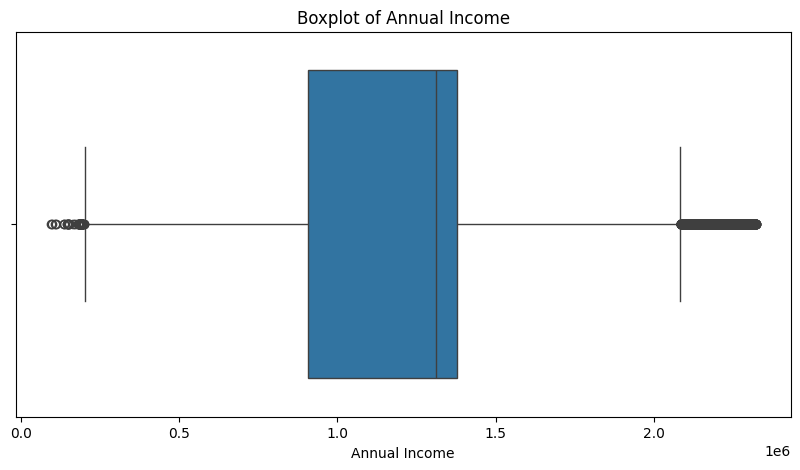

In [19]:
# Boxplot to detect outliers in numerical columns
for column in ['Current Loan Amount', 'Monthly Debt', 'Annual Income']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


The outliers in Montly debt shows higher risk as they indicate higher amount of debt every month user is paying.
Outlier in Annual Income is a good sign and less riskier to provide loan, as repaying capacity of the user will be higher. 

Column Data Types:
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


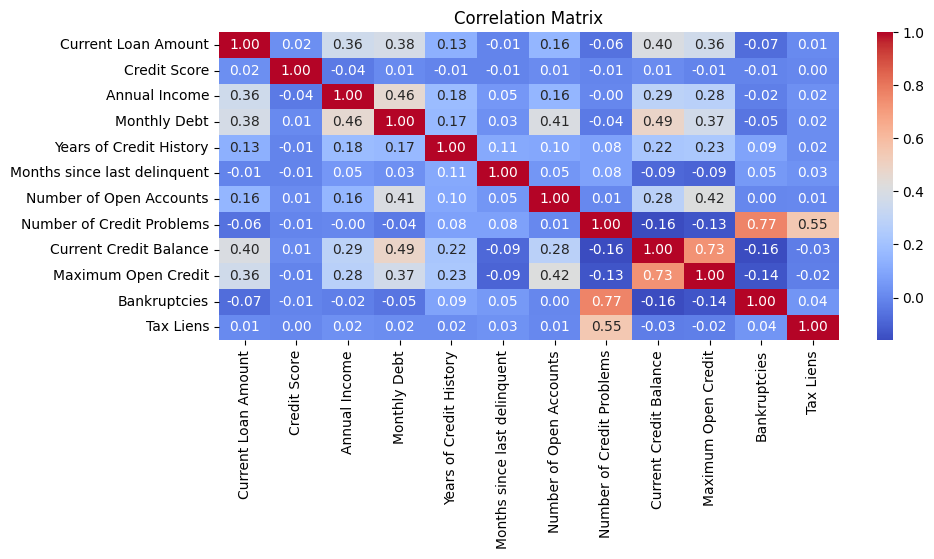

In [22]:
# Step 1: Check Data Types
print("Column Data Types:")
print(data.dtypes)

# Step 2: Select Numeric Columns Only (Converting any mixed-type columns)
# Force any non-numeric values within numeric columns to NaN
numeric_data = data.apply(pd.to_numeric, errors='coerce')

# Step 3: Drop Columns with All NaN Values (these are non-numeric columns)
numeric_data = numeric_data.dropna(axis=1, how='all')

# Step 4: Calculate the Correlation Matrix
correlation_matrix = numeric_data.corr()

# Step 5: Plot the Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

The high positive correaltion between Bankrupties and Number of Credit Problems are indicative of High risk. 
Current Credit card balace and Monthly Debt, Tax Liens and Number of Credit problems, Annual Income and Monthly debt are clear indicatives of High risk. 

Testing of Hypothesis

In [24]:
data.describe()

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         75568.000000  75568.000000   7.556800e+04   75568.000000   
mean         292492.003838   1125.651040   1.217965e+06   16838.567216   
std          159714.818314   1399.019464   4.093620e+05    9766.563642   
min           10802.000000    585.000000   9.486700e+04       0.000000   
25%          177188.000000    715.000000   9.078200e+05    9829.792500   
50%          287320.000000    737.000000   1.309917e+06   15338.225000   
75%          366718.000000   1076.456089   1.378277e+06   22218.790000   
max          789250.000000   7510.000000   2.321040e+06  152512.240000   

       Years of Credit History  Months since last delinquent  \
count             75568.000000                  75568.000000   
mean                 17.528337                     16.381961   
std                   6.602111                     23.136692   
min                   3.600000                      0.000000   
25%                  13.000000                      0.000000   
50%                  16.500000                      0.000000   
75%                  20.900000                     30.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             75568.000000               75568.000000   
mean                 10.814591                   0.166102   
std                   4.765905                   0.469892   
min                   0.000000                   0.000000   
25%                   7.000000                   0.000000   
50%                  10.000000                   0.000000   
75%                  13.000000                   0.000000   
max                  76.000000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            7.556800e+04         7.556800e+04  75568.000000  75568.000000  
mean             2.393867e+05         5.121442e+05      0.118661      0.025394  
std              1.803633e+05         3.274341e+05      0.350454      0.237383  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.077300e+05         2.628120e+05      0.000000      0.000000  
50%              1.947310e+05         4.376570e+05      0.000000      0.000000  
75%              3.262680e+05         6.978015e+05      0.000000      0.000000  
max              3.014255e+06         1.552826e+06      7.000000     15.000000

HYPOTHESIS 1

LOAN STATUS VS CREDIT SCORE

H0:There is no significant difference between the avaerage credit scores between fully paid loan and charged-off loans.

H1:There is significant difference between the avaerage credit scores between fully paid loan and charged-off loans.

In [61]:
#Filter data based on loan status categories
fully_paid_loans=data[data['Loan Status']=='Fully Paid']
charged_off_loans=data[data['Loan Status']=='Charged Off']

In [62]:
from scipy.stats import ttest_ind

t_stat,p_value=ttest_ind(fully_paid_loans['Credit Score'].dropna(),charged_off_loans['Credit Score'].dropna())
print(f"T-Statistics: {t_stat}, P-value: {p_value}")

#Interpretation
alpha=0.05
if p_value<alpha:
    print("Reject Null Hypothesis")
    print("There is significant difference between the avaerage credit scores between fully paid loan and charged-off loans.")
else:
    print("Accept Null Hypothesis")

T-Statistics: -119.2915545385581, P-value: 0.0
Reject Null Hypothesis
There is significant difference between the avaerage credit scores between fully paid loan and charged-off loans.


HYPOTHESIS 2

MONTHLY DEBT AND LOAN STATUS

H0: There is no significant difference in the Debt-To-Income Ratio(DTI ratio) between fully paid loan and charged-off loans.
    
H1: There is significant difference in the Debt-To-Income Ratio(DTI ratio) between fully paid loan and charged-off loans.


In [63]:
#DTI ratio
fully_paid_loans['DTI']=fully_paid_loans['Monthly Debt']/fully_paid_loans['Annual Income']
charged_off_loans['DTI']=charged_off_loans['Monthly Debt']/charged_off_loans['Annual Income']

#t-test
t_stat,p_value=ttest_ind(fully_paid_loans['DTI'].dropna(),charged_off_loans['DTI'].dropna())
print(f"T-Statistics: {t_stat}, P-value: {p_value}")

#Interpretation
if p_value<alpha:
    print("Reject Null Hypothesis")
    print("There is  significant difference in the Debt-To-Income Ratio(DTI ratio) between fully paid loan and charged-off loans.")
else:
    print("Accept Null Hypothesis")

T-Statistics: -23.627381606456165, P-value: 5.6467078981107195e-123
Reject Null Hypothesis
There is  significant difference in the Debt-To-Income Ratio(DTI ratio) between fully paid loan and charged-off loans.


C:\Users\Govind\AppData\Local\Temp\ipykernel_17120\1441260755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_paid_loans['DTI']=fully_paid_loans['Monthly Debt']/fully_paid_loans['Annual Income']
C:\Users\Govind\AppData\Local\Temp\ipykernel_17120\1441260755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['DTI']=charged_off_loans['Monthly Debt']/charged_off_loans['Annual Income']


In [39]:
pip install scipy

   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.8 MB 480.1 kB/s eta 0:01:33
   ---------------------------------------- 0.5/44.8 MB 480.1 kB/s eta 0:01:33
   ---------------------------------------- 0.5/44.8 MB 480.1 kB/s eta 0:01:33
    --------------------------------------- 0.8/44.8 MB 453.5 kB/s eta 0:01:38
    --------------------------------------- 0.8/44.8 MB 453.5 kB/s eta 0:01:38
    --------------------------------------- 0.8/44.8 MB 453.5 kB/s eta 0:01:38
    --------------------------------------- 0.8/44.8 MB 453.5 kB/s eta 0:01:38
    --------------------------------------- 1.0/44.8 MB 406.0 kB/s eta 0:01:48
    --------------